## Installing and Loading Dependencies

In [152]:
!pip install tensorflow tensorflow-gpu tensorflow-io matplotlib

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\owner\\anaconda3\\lib\\site-packages\\tensorflow\\__pycache__\\'



  Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 2.9.1
    Uninstalling tensorflow-gpu-2.9.1:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Owner\\AppData\\Local\\Temp\\pip-uninstall-jawr7c5l\\python\\flags_pybind.pyd'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Attempting uninstall: tensorflow-gpu
    Found existing installation: tensorflow-gpu 2.9.1
    Uninstalling tensorflow-gpu-2.9.1:
      Successfully uninstalled tensorflow-gpu-2.9.1


In [158]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

## Data Loading Function

In [273]:
CAPUCHIN_FILE = os.path.join('Data', 'Parsed_Capuchinbird_Clips', 'XC3776-0.wav')
NOT_CAPUCHIN_FILE = os.path.join('Data', 'Parsed_Not_Capuchinbird_Clips', 'tawny-owl-sounds-6.wav')

In [274]:
def load_wav_16k_mono(filename):
    
    #load encoded wav file
    
    file_contents = tf.io.read_file(filename)
    
    #decode wav(tensors by channels)
    
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels = 1)
    
    #removes trailing axis
    
    wav = tf.squeeze(wav, axis = -1)
    sample_rate = tf.cast(sample_rate, dtype = tf.int64)
    
    #changes from 44k Hz to 16k Hz - amplitude of the audio signal
    
    wav = tfio.audio.resample(wav, rate_in = sample_rate, rate_out = 16000)
    return wav

In [275]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

In [276]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)

In [277]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels = 1)

In [278]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [279]:
len(wav)

132300

In [280]:
wav = tfio.audio.resample(wav, rate_in = 44100, rate_out = 16000)

In [281]:
len(wav)

48000

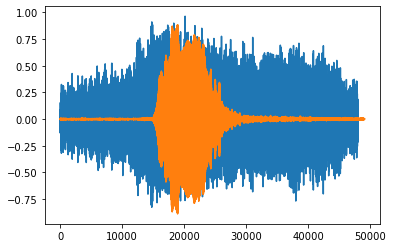

In [282]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

### TensorFlow Dataset Creation

In [283]:
POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [284]:
NEG

'data\\Parsed_Not_Capuchinbird_Clips'

In [285]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')

In [286]:
pos.as_numpy_iterator().next()

b'data\\Parsed_Capuchinbird_Clips\\XC46241-0.wav'

In [287]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [174]:
positives.as_numpy_iterator().next()

(b'data\\Parsed_Capuchinbird_Clips\\XC3776-2.wav', 1.0)

In [175]:
negatives.as_numpy_iterator().next()

(b'data\\Parsed_Not_Capuchinbird_Clips\\rain-thunder-and-crickets-sound-effect-27.wav',
 0.0)

In [176]:
data.shuffle(10000).as_numpy_iterator().next()

(b'data\\Parsed_Capuchinbird_Clips\\XC227469-4.wav', 1.0)

### Determine Length(average) of Call

In [177]:
lengths = []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [178]:
os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips'))

['XC114131-0.wav',
 'XC114131-1.wav',
 'XC114131-2.wav',
 'XC114131-3.wav',
 'XC114131-4.wav',
 'XC114132-0.wav',
 'XC114132-1.wav',
 'XC114132-2.wav',
 'XC114132-3.wav',
 'XC114132-4.wav',
 'XC114132-5.wav',
 'XC114132-6.wav',
 'XC119294-0.wav',
 'XC16803-0.wav',
 'XC16803-1.wav',
 'XC16803-2.wav',
 'XC16804-0.wav',
 'XC16804-1.wav',
 'XC168899-0.wav',
 'XC178167-0.wav',
 'XC178167-1.wav',
 'XC178167-2.wav',
 'XC178167-3.wav',
 'XC178168-0.wav',
 'XC178168-1.wav',
 'XC178168-2.wav',
 'XC178168-3.wav',
 'XC178168-4.wav',
 'XC178168-5.wav',
 'XC178168-6.wav',
 'XC178168-7.wav',
 'XC201990-0.wav',
 'XC201990-1.wav',
 'XC201990-2.wav',
 'XC201990-3.wav',
 'XC201990-4.wav',
 'XC201990-5.wav',
 'XC216010-0.wav',
 'XC216010-1.wav',
 'XC216010-2.wav',
 'XC216010-3.wav',
 'XC216010-4.wav',
 'XC216010-5.wav',
 'XC216010-6.wav',
 'XC216010-7.wav',
 'XC216012-0.wav',
 'XC216012-1.wav',
 'XC216012-10.wav',
 'XC216012-11.wav',
 'XC216012-12.wav',
 'XC216012-13.wav',
 'XC216012-14.wav',
 'XC216012-1

In [179]:
lengths

[40000,
 48000,
 56000,
 48000,
 56000,
 64000,
 64000,
 64000,
 56000,
 56000,
 48000,
 56000,
 64000,
 56000,
 40000,
 64000,
 64000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 64000,
 64000,
 48000,
 56000,
 64000,
 56000,
 64000,
 32000,
 40000,
 48000,
 40000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 64000,
 64000,
 48000,
 64000,
 48000,
 48000,
 40000,
 48000,
 48000,
 56000,
 56000,
 48000,
 40000,
 56000,
 48000,
 40000,
 56000,
 48000,
 48000,
 56000,
 48000,
 64000,
 64000,
 40000,
 40000,
 72000,
 56000,
 56000,
 56000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 40000,
 64000,
 56000,
 56000,
 40000,
 64000,
 56000,
 64000,
 48000,
 64000,
 56000,
 48000,
 48000,
 48000,
 64000,
 64000,
 64000,
 48000,
 48000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 40000,
 48000,
 48000,


In [180]:
# calculating mean

tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [181]:
# calculating min

tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [182]:
# calculating max

tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

### Preprocessing Function for Spectrogram Conversion

In [183]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype = tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length = 320, frame_step = 32) #short time fourier transform
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis = 2)
    return spectrogram, label

In [184]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype = tf.float32)
wav = tf.concat([zero_padding, wav],0)

In [185]:
spectrogram = tf.signal.stft(wav, frame_length = 320, frame_step = 32)
spectrogram = tf.abs(spectrogram)
spectrogram = tf.expand_dims(spectrogram, axis = 2)

In [186]:
filepath, label = negatives.shuffle(buffer_size = 10000).as_numpy_iterator().next()

In [187]:
spectrogram, label = preprocess(filepath, label)

In [188]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[3.16838250e-02],
        [7.16743395e-02],
        [1.07262023e-01],
        ...,
        [4.34773916e-04],
        [1.97029469e-04],
        [4.00412828e-05]],

       [[4.71663140e-02],
        [7.14496896e-02],
        [1.10206224e-01],
        ...,
        [4.16956813e-04],
        [1.36328934e-04],
        [5.47915697e-05]],

       [[2.99918838e-02],
        [7.12263584e-02],
        [1.14730015e-01],
        ...,
        [3.34314274e-04],
        [1.35894690e-04],
        [3.43834981e-05]],

       ...,

       [[8.98553152e-03],
        [4.93680164e-02],
        [8.57720673e-02],
        ...,
        [6.53559327e-05],
        [2.07364792e-05],
        [1.56899914e-05]],

       [[2.36673094e-02],
        [6.31841570e-02],
        [9.34074670e-02],
        ...,
        [1.30324799e-04],
        [5.55718434e-05],
        [6.83693215e-05]],

       [[5.54968119e-02],
        [7.53948689e-02],
        [9.40854624e-02]

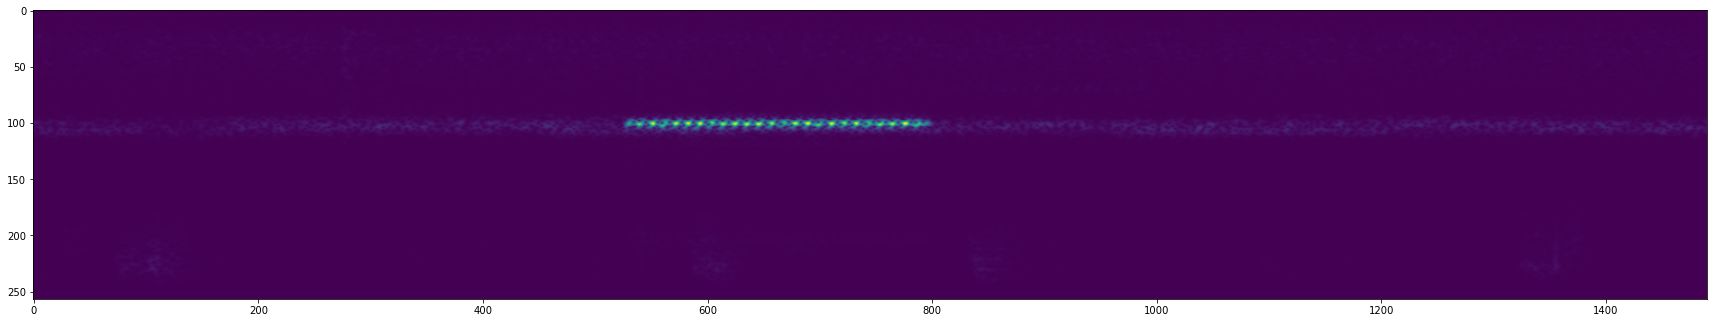

In [189]:
# not capuchin

plt.figure(figsize = (30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [193]:
filepath, label = positives.shuffle(buffer_size = 10000).as_numpy_iterator().next()

In [194]:
spectrogram, label = preprocess(filepath, label)

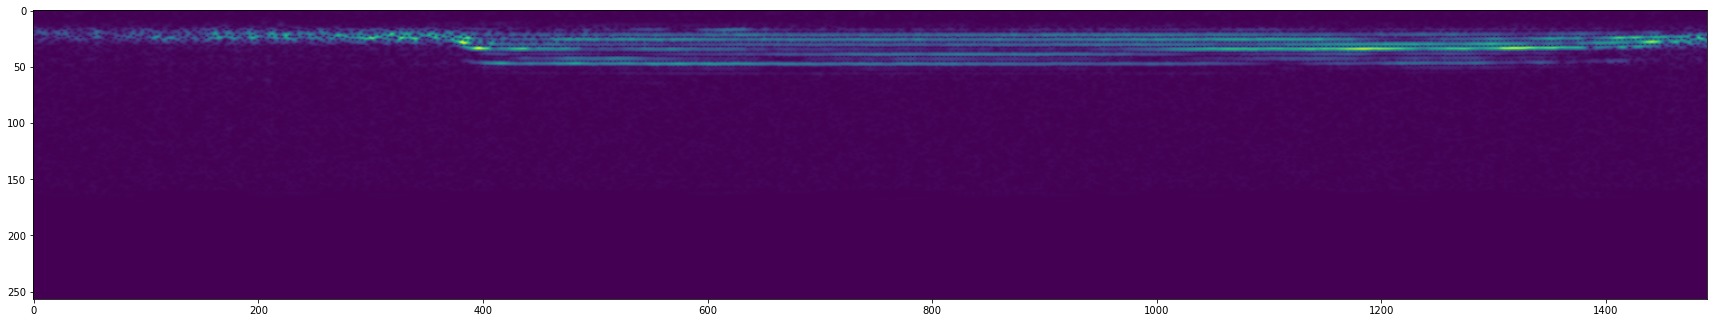

In [195]:
# capuchin

plt.figure(figsize = (30, 20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### Training and Testing

In [196]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [197]:
len(data)

51

In [198]:
len(data)*.7

35.699999999999996

In [199]:
train = data.take(36)
test = data.skip(36).take(15)

In [200]:
samples, labels = train.as_numpy_iterator().next()

In [201]:
samples.shape

(16, 1491, 257, 1)

In [202]:
labels

array([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
      dtype=float32)

### Deep Learning Model

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [205]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = (1491, 257, 1)))
model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [206]:
model.compile('Adam', loss = 'BinaryCrossentropy', metrics = [tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [207]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


In [208]:
hist = model.fit(train, epochs = 4, validation_data = test)

Epoch 1/4
27/36 [=====================>........] - ETA: 2:23 - loss: 7.4387 - recall: 0.7589 - precision: 0.7589Collecting tensorflow==2.4.1Collecting tensorflow==2.4.1


  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)

  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)

  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)

  Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.9.2-cp38-cp38-win_amd64.whl (444.1 MB)
28/36 [======================>.......] - ETA: 2:09 - loss: 7.1747 - recall: 0.7632 - precision: 0.7565

ERROR: Exception:ERROR: Exception:
Traceback (most recent call last):

  File "C:\Users\Owner\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Owner\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Owner\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Owner\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\Owner\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Owner\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Owner\anaconda3\lib\ssl.py", line 1099, i

32/36 [=========================>....] - ETA: 1:04 - loss: 6.2868 - recall: 0.7891 - precision: 0.7769Collecting tensorflow==2.4.1
  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_gpu-2.10.0-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached tensorflow_gpu-2.9.2-cp38-cp38-win_amd64.whl (444.1 MB)


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Owner\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Owner\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Owner\anaconda3\lib\http\client.py", line 458, in read
    n = self.readinto(b)
  File "C:\Users\Owner\anaconda3\lib\http\client.py", line 502, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Owner\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Owner\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Owner\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
Con

36/36 [==============================] - 600s 17s/step - loss: 5.5906 - recall: 0.8224 - precision: 0.8117 - val_loss: 0.3316 - val_recall: 1.0000 - val_precision: 0.9355
Epoch 2/4
36/36 [==============================] - 559s 16s/step - loss: 0.0571 - recall: 0.9804 - precision: 0.9934 - val_loss: 0.0026 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 546s 15s/step - loss: 0.0144 - recall: 0.9859 - precision: 1.0000 - val_loss: 0.0231 - val_recall: 0.9846 - val_precision: 0.9846
Epoch 4/4
36/36 [==============================] - 515s 14s/step - loss: 0.0110 - recall: 0.9935 - precision: 0.9935 - val_loss: 0.0021 - val_recall: 1.0000 - val_precision: 1.0000


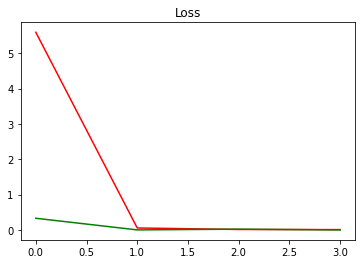

In [227]:
# Loss Plot
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'g')
plt.show()

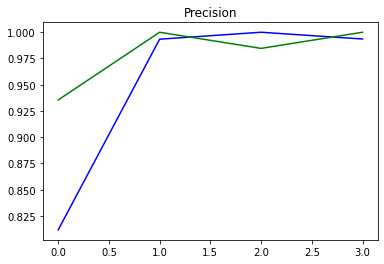

In [228]:
# Precision Plot
plt.title('Precision')
plt.plot(hist.history['precision'], 'b')
plt.plot(hist.history['val_precision'], 'g')
plt.show()

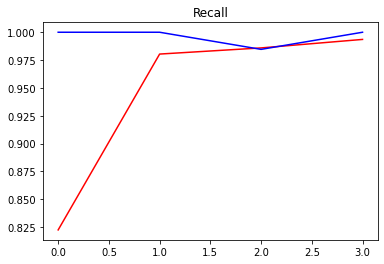

In [229]:
# Recall Plot
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

### Prediction

In [230]:
X_test, y_test = test.as_numpy_iterator().next()

In [231]:
X_test.shape

(16, 1491, 257, 1)

In [232]:
y_test.shape

(16,)

In [233]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 446ms/step


In [234]:
yhat

array([[1.0000000e+00],
       [9.9999988e-01],
       [1.0252681e-18],
       [2.4301906e-08],
       [9.9392724e-01],
       [8.7458202e-10],
       [4.6346866e-04],
       [9.9498004e-01],
       [2.5134266e-05],
       [0.0000000e+00],
       [8.5218209e-14],
       [1.0000000e+00],
       [1.5108606e-08],
       [1.1014750e-28],
       [1.0000000e+00],
       [9.2104056e-05]], dtype=float32)

In [235]:
# Converting to classes

yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [236]:
yhat

[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]

In [238]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [239]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [240]:
y_test.astype(int)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

### Forest Parsing Functions

In [241]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    
    res = tfio.audio.AudioIOTensor(filename)
    
    # Convert to tensor then combine channels 
    
    tensor = res.to_tensor()
    
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    
    # Extracting sample rate and cast
    
    sample_rate = res.rate
    
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    
    # 16 kHz resample
    
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    
    return wav

In [242]:
mp3 = os.path.join('Data', 'Forest Recordings', 'recording_04.mp3')

In [243]:
wav = load_mp3_16k_mono(mp3)

In [244]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length = 48000, sequence_stride = 48000, batch_size = 1)

In [245]:
samples, indez = audio_slices.as_numpy_iterator().next()

In [246]:
len(audio_slices)

60

In [247]:
samples.shape

(1, 48000)

In [248]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype = tf.float32)
    wav = tf.concat([zero_padding, sample], 0)
    spectrogram = tf.signal.stft(wav, frame_length = 320, frame_step = 32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis = 2)
    return spectrogram

In [252]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length = 48000, sequence_stride = 48000, batch_size = 1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [260]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

1/1 [==============================] - 2s 2s/step


In [261]:
yhat

[0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0]

In [258]:
len(yhat)

60

In [259]:
# grouping consecutinve detections

from itertools import groupby

In [262]:
yhat = [key for key, group in groupby(yhat)]

In [263]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [264]:
calls = tf.math.reduce_sum(yhat).numpy()

In [265]:
calls

6

### Making some Predictions

In [267]:
# Loop through recordings

results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data', 'Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length = 48000, sequence_stride = 48000, batch_size = 1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

1/1 [==============================] - 1s 1s/step


In [269]:
# converting prediction to classes

class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_00.mp3': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_02.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [0,
  0,
  0,
  

In [270]:
# Grouping consecutive detections
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_02.mp3': 0,
 'recording_03.mp3': 0,
 'recording_04.mp3': 6,
 'recording_05.mp3': 0,
 'recording_06.mp3': 7,
 'recording_07.mp3': 2,
 'recording_08.mp3': 18,
 'recording_09.mp3': 0,
 'recording_10.mp3': 5,
 'recording_11.mp3': 4,
 'recording_12.mp3': 0,
 'recording_13.mp3': 0,
 'recording_14.mp3': 0,
 'recording_15.mp3': 2,
 'recording_16.mp3': 6,
 'recording_17.mp3': 2,
 'recording_18.mp3': 6,
 'recording_19.mp3': 0,
 'recording_20.mp3': 0,
 'recording_21.mp3': 1,
 'recording_22.mp3': 2,
 'recording_23.mp3': 6,
 'recording_24.mp3': 0,
 'recording_25.mp3': 2,
 'recording_26.mp3': 2,
 'recording_27.mp3': 0,
 'recording_28.mp3': 2,
 'recording_29.mp3': 0,
 'recording_30.mp3': 3,
 'recording_31.mp3': 1,
 'recording_32.mp3': 2,
 'recording_33.mp3': 0,
 'recording_34.mp3': 4,
 'recording_35.mp3': 0,
 'recording_36.mp3': 0,
 'recording_37.mp3': 5,
 'recording_38.mp3': 1,
 'recording_39.mp3': 1,
 'recording_40.mp3': 1,
 'recording_41.

### Exporting the data into a CSV file

In [271]:
import csv

In [272]:
with open('call_results.csv', 'w', newline = '') as f:
    writer  = csv.writer(f, delimiter = ',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])